In [61]:
%matplotlib inline
import sys
sys.path.append("..")

In [62]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from util.tablogger import TabLogger

In [67]:
# load the file from the experiments directories

prog = re.compile("Epoch (?P<epoch>\d+)/\d+ LR: (?P<lr>\d+.\d+) \| Train Task Loss: (?P<train_tl>\d+.\d+) KDL: (?P<train_kdl>\d+.\d+) Mask Loss: (?P<train_ml>\d+.\d+) Acc: (?P<train_acc>\d+.\d+) \| Eval Acc: (?P<eval_acc>\d+.\d+) \| Params: (?P<params>\d+.\d+e\+\d+)")

df = pd.DataFrame({})
for mr in (1, 2, 10, 20, 40):    
    fpath = os.path.join(
        "..",
        "experiments",
        "joint_kd_prune-cifar100-vgg19_bn_mr{}".format(mr),
#         "out",
#         "epoch.out"
        "logs",
        "info.log"
    )

    dd = {}
    with open(fpath, "r") as logf:
        for line in logf:
            match = prog.search(line)
            if match:
                dd["Mask Reg"] = dd.get("Mask Reg", []) + ["MR"+ str(mr)]
                dd["Epoch"] = dd.get("Epoch", []) + [int(match.group("epoch"))]
                dd["LR"] = dd.get("LR", []) + [float(match.group("lr"))]
                dd["Train Task Loss"] = dd.get("Train Task Loss", []) + [float(match.group("train_tl"))]
                dd["Train KD Loss"] = dd.get("Train KD Loss", []) + [float(match.group("train_kdl"))]
                dd["Train Mask Loss"] = dd.get("Train Mask Loss", []) + [float(match.group("train_ml"))]
                dd["Train Acc"] = dd.get("Train Acc", []) + [float(match.group("train_acc"))]
                dd["Eval Acc"] = dd.get("Eval Acc", []) + [float(match.group("eval_acc"))]
                dd["Params"] = dd.get("Params", []) + [float(match.group("params"))]

    # concat the dataframe
    df = pd.concat([df, pd.DataFrame(dd)])

In [68]:
print(df)
print(set(df["Mask Reg"]))

    Mask Reg  Epoch      LR  Train Task Loss  Train KD Loss  Train Mask Loss  \
0        MR1      0  0.0001           0.5569         0.3469           0.9633   
1        MR1      1  0.0001           0.7228         0.4238           0.9222   
2        MR1      2  0.0001           0.7464         0.4449           0.8964   
3        MR1      3  0.0001           0.6864         0.4389           0.8739   
4        MR1      4  0.0001           0.7203         0.4392           0.8577   
..       ...    ...     ...              ...            ...              ...   
159     MR40    159  0.0000           6.3421         2.2525          13.9544   
160     MR40    160  0.0000           6.2986         2.2428          13.9689   
161     MR40    161  0.0000           6.3647         2.2586          13.9747   
162     MR40    162  0.0000           6.4032         2.2541          13.9791   
163     MR40    163  0.0000           6.3562         2.2544          13.9522   

     Train Acc  Eval Acc      Params  


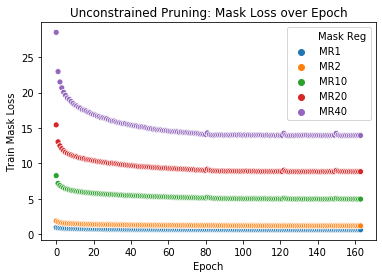

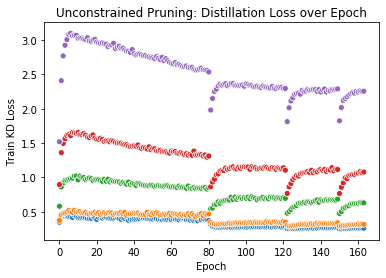

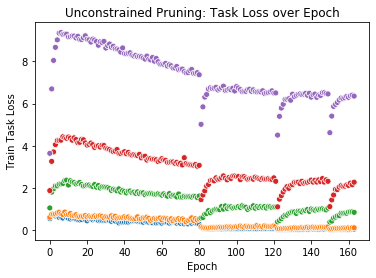

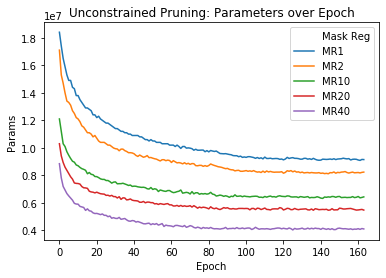

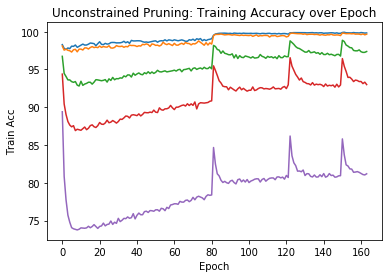

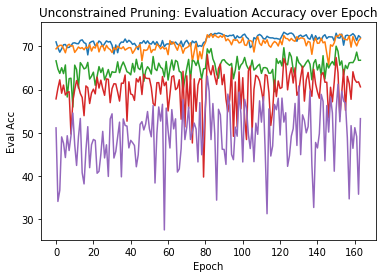

In [74]:
# plot in Seaborn
# plt.figure(figsize=(15, 6))


ml = sns.scatterplot(
    x="Epoch", y="Train Mask Loss", hue="Mask Reg", data=df
)
ml.set(title="Unconstrained Pruning: Mask Loss over Epoch")
plt.savefig("unconstrained_pruning-train_mask_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


kdl = sns.scatterplot(
    x="Epoch", y="Train KD Loss", hue="Mask Reg", data=df, legend=False
)
kdl.set(title="Unconstrained Pruning: Distillation Loss over Epoch")
plt.savefig("unconstrained_pruning-train_kd_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


tl = sns.scatterplot(
    x="Epoch", y="Train Task Loss", hue="Mask Reg", data=df, legend=False
)
tl.set(title="Unconstrained Pruning: Task Loss over Epoch")
plt.savefig("unconstrained_pruning-train_task_loss-cifar100-vgg19_bn.png", dpi=200)
plt.show()


pm = sns.lineplot(
    x="Epoch", y="Params", hue="Mask Reg", data=df
)
pm.set(title="Unconstrained Pruning: Parameters over Epoch")
plt.savefig("unconstrained_pruning-unmasked_parameters-cifar100-vgg19_bn.png", dpi=200)
plt.show()

ta = sns.lineplot(
    x="Epoch", y="Train Acc", hue="Mask Reg", data=df, legend=False
)
ta.set(title="Unconstrained Pruning: Training Accuracy over Epoch")
plt.savefig("unconstrained_pruning-train_acc-cifar100-vgg19_bn.png", dpi=200)
plt.show()


ea = sns.lineplot(
    x="Epoch", y="Eval Acc", hue="Mask Reg", data=df, legend=False
)
ea.set(title="Unconstrained Pruning: Evaluation Accuracy over Epoch")
plt.savefig("unconstrained_pruning-eval_acc-cifar100-vgg19_bn.png", dpi=200)
plt.show()


# ta = sns.relplot(
#     x="Epoch", y="Train Acc", hue="Mask Reg", data=df,
#     col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
#     col="LR", facet_kws=dict(sharex=False, sharey=False),
# )
# plt.show()
# ea = sns.relplot(
#     x="Epoch", y="Eval Acc", hue="Mask Reg", data=df,
#     col_order=[0.0001, 0.00001, 0.000001], kind="line", palette="colorblind",
#     col="LR", facet_kws=dict(sharex=False, sharey=False),
# )
# g.set_yscale("log")
# plt.savefig("eval_acc-cifar100-vgg19_bn-full.png", dpi=200)
plt.show()